In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import sklearn.metrics as metrics

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
dd=pd.read_csv("C:\\Users\\lenovo\\Documents\\Default.csv")

In [8]:
dd.head()

,num,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [9]:
dd.shape

(10000, 5)

In [10]:
dd.describe()

,num,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


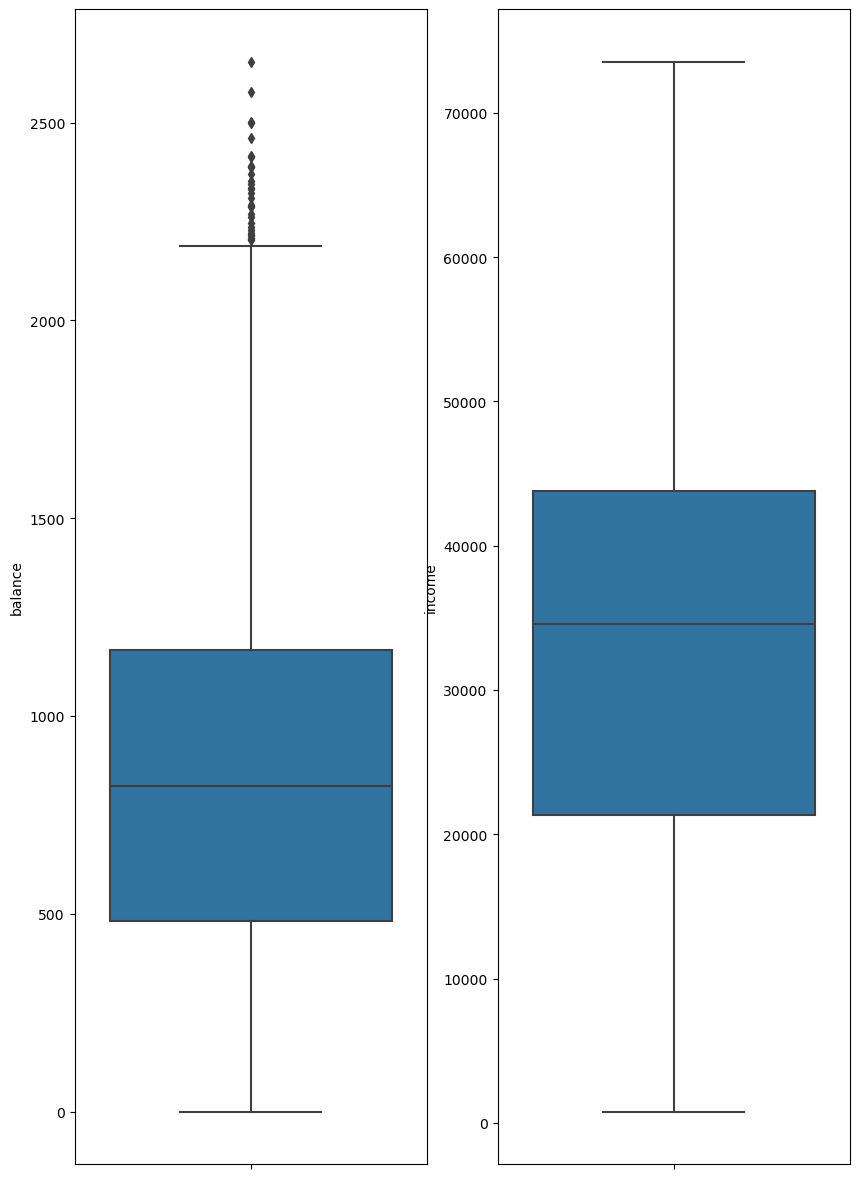

In [11]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y=dd['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=dd['income'])

plt.show()

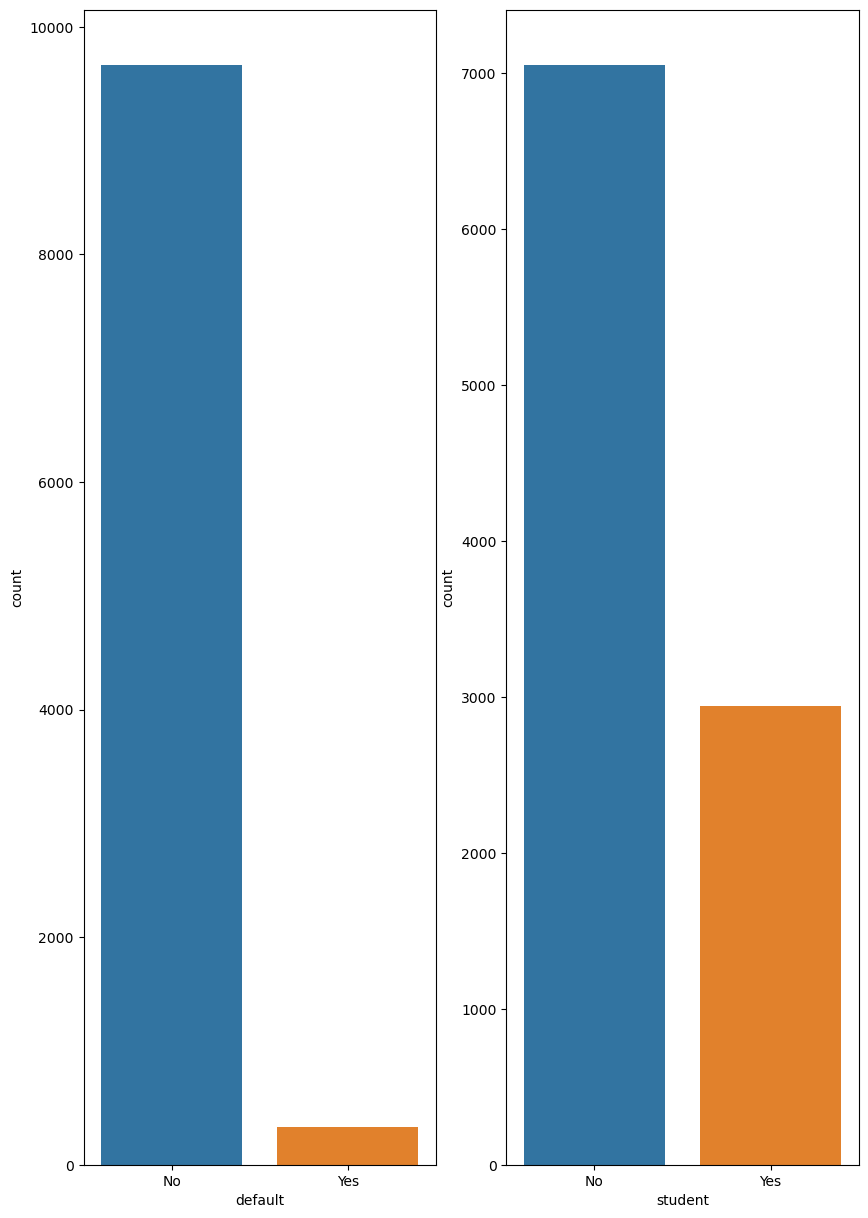

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.countplot(dd['default'])

plt.subplot(1,2,2)
sns.countplot(dd['student'])
plt.show()

In [13]:
dd.value_counts('default')

default
No     9667
Yes     333
dtype: int64

In [14]:
dd.value_counts('student')

student
No     7056
Yes    2944
dtype: int64

In [15]:
dd['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [16]:
dd['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

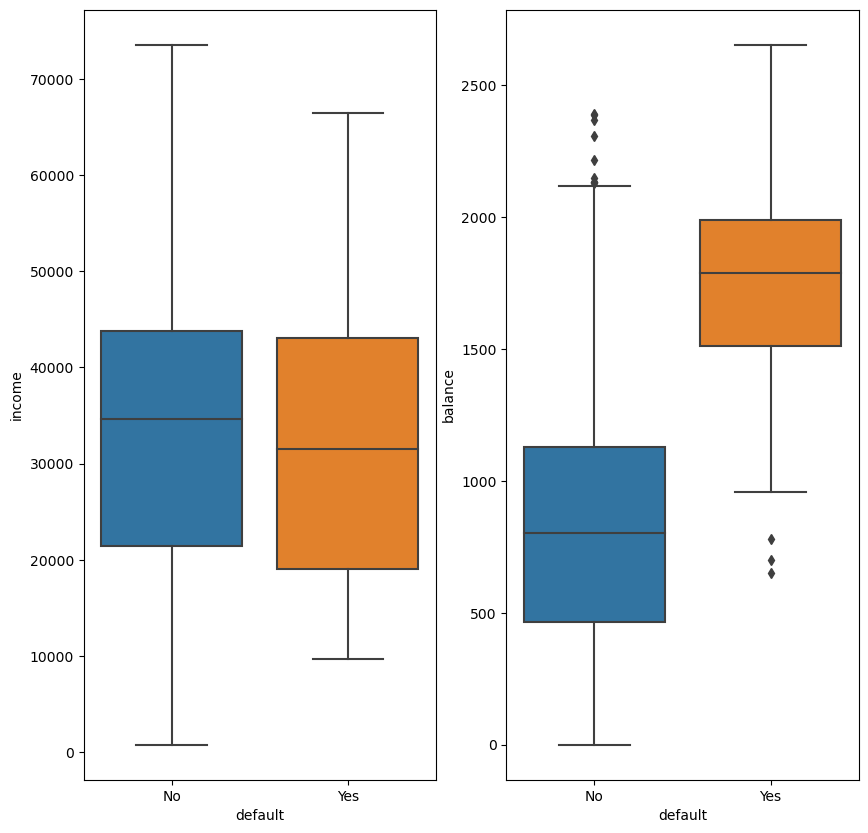

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

sns.boxplot(dd['default'],dd['income'])

plt.subplot(1,2,2)
sns.boxplot(x=dd['default'],y=dd['balance'])

plt.show()

In [18]:
pd.crosstab(dd['student'],dd['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


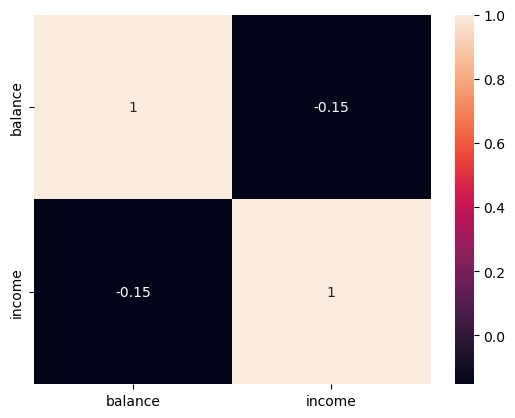

In [19]:
sns.heatmap(dd[['balance','income']].corr(),annot=True)
plt.show()

In [20]:
dd.isnull().sum()

num        0
default    0
student    0
balance    0
income     0
dtype: int64

In [21]:
q1,q3=dd['balance'].quantile([.25,.75])

In [22]:
iqr=q3-q1

In [23]:
lowerlimit=q1 - 1.5*(iqr)

In [24]:
uperlimit=q3 + 1.5*(iqr)

In [25]:
lowerlimit

-545.1348175

In [26]:
uperlimit

2193.1743093

In [27]:
df=dd[dd['balance']>uperlimit]

In [28]:
df

,num,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492250
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519750
1359,1360,Yes,No,2220.966201,40725.096210
1502,1503,Yes,Yes,2332.878254,11770.234120
1609,1610,Yes,Yes,2269.946966,18021.105950
2096,2097,Yes,Yes,2261.848162,20030.165120
2140,2141,No,Yes,2308.893236,19110.266410
2929,2930,Yes,Yes,2387.314867,28296.914720
3162,3163,Yes,Yes,2415.316994,17429.503370


In [29]:
df.count()

num        31
default    31
student    31
balance    31
income     31
dtype: int64

In [30]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [31]:
df.value_counts('default')

default
Yes    26
No      5
dtype: int64

In [32]:
dd['balance']=np.where(dd['balance']>uperlimit,uperlimit,dd['balance'])

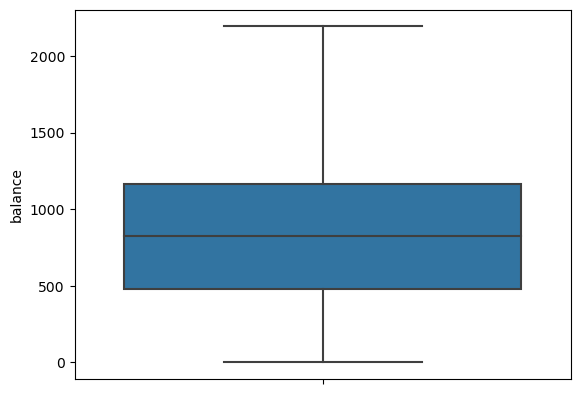

In [33]:
sns.boxplot(y=dd['balance'])
plt.show()

In [34]:
dd=pd.get_dummies(dd,drop_first=True)

In [35]:
dd.head()

,num,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [36]:
dd.columns=['num','balance','income','default','student']

In [37]:
dd.head()

,num,balance,income,default,student
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x=dd.drop('default',axis=1)

In [40]:
y=dd['default']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify= y)

In [42]:
x_train.shape

(7000, 4)

In [43]:
x_test.shape

(3000, 4)

In [44]:
y_train.value_counts(normalize=True).round(2)

0    0.97
1    0.03
Name: default, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

0    0.966667
1    0.033333
Name: default, dtype: float64

In [46]:
from sklearn.datasets import make_classification

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
sm=SMOTE(random_state=33,sampling_strategy=0.75)

In [53]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(x_res,y_res)

LogisticRegression()

In [58]:
y_test_pred=lr.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[2226,  674],
       [  21,   79]], dtype=int64)

In [61]:
(2226+79)/(2226+79+674+21)

0.7683333333333333